In [1]:
%load_ext nb_black

<IPython.core.display.Javascript object>

# Imports

In [2]:
from sklearn.model_selection import train_test_split
from toy_example.datasets import FoundrySQLWrapper
from toy_example.model import LogisticRegressionWrapper
from toy_example.performance import print_performance_metrics, get_performance_metrics
from toy_example.preprocessing import clean_ecds, split_features_targets
from toy_example.visualisation import plot_roc, plot_confusion_matrix, visualise_data

<IPython.core.display.Javascript object>

# Configuration

In [3]:
RANDOM_STATE = 42
TEST_PROPORTION = 0.33

<IPython.core.display.Javascript object>

# Load Data

In [4]:
foundry_wrapper = FoundrySQLWrapper()

<IPython.core.display.Javascript object>

In [5]:
acute_type_one_trusts = foundry_wrapper.get_acute_type_one_trusts()

<IPython.core.display.Javascript object>

In [6]:
acute_type_one_trusts

array(['RRK', 'RXK', 'RQ3', 'RD1', 'RA4', 'RXR', 'RCF', 'RAE', 'R0D',
       'RMC', 'RYR', 'RXH', 'RA7', 'RVJ', 'RNN', 'RGT', 'RJR', 'RBL',
       'RQW', 'RDE', 'RJ6', 'RVV', 'RLT', 'RKB', 'RJC', 'RBT', 'RN7',
       'RTG', 'RXP', 'RP5', 'RJL', 'RBD', 'RNA', 'R1H', 'RQX', 'RH8',
       'RBZ', 'RXL', 'RTE', 'RDU', 'RA2', 'R1K', 'RWY', 'RCD', 'RXQ',
       'RLQ', 'RWA', 'RGR', 'RTK', 'RAX', 'RBS', 'RBN', 'REM', 'RTX',
       'RWE', 'RWD', 'RR8', 'RC9', 'R0A', 'RM3', 'RW6', 'RWF', 'RPA',
       'RD8', 'RAP', 'RKE', 'RTF', 'RTD', 'RR7', 'RK5', 'RX1', 'RNS',
       'RNQ', 'RGP', 'RM1', 'RRV', 'RAL', 'RMP', 'RTH', 'RGN', 'RCX',
       'RK9', 'R1F', 'RHU', 'RXN', 'RVY', 'RHW', 'RN5', 'RTP', 'RF4',
       'RCU', 'RFS', 'RHQ', 'RFR', 'RFF', 'RJ1', 'RJ2', 'RJZ', 'RWH',
       'RJN', 'RWJ', 'RVR', 'RN3', 'RHM', 'RNZ', 'R0B', 'RAJ', 'RJE',
       'RQM', 'RJ7', 'RXW', 'RH5', 'RXC', 'RA9', 'REF', 'RVW', 'RTR',
       'RAS', 'RYJ', 'RWW', 'RWG', 'RXF', 'RRF', 'RWP', 'RBK', 'RL4',
       'RCB'], dtype

<IPython.core.display.Javascript object>

In [7]:
ecds_df = foundry_wrapper.get_ecds(location_ids=acute_type_one_trusts)

<IPython.core.display.Javascript object>

# Clean Data

In [8]:
ecds_df.head(5)

,der_provider_code,age_at_arrival,sex,admitted
0,RJ2,72,1,0
1,RJZ,40,1,0
2,RTR,50,2,0
3,RM3,24,2,0
4,RA7,1,1,1


<IPython.core.display.Javascript object>

In [9]:
clean_ecds_df = clean_ecds(ecds_df=ecds_df)

<IPython.core.display.Javascript object>

In [10]:
clean_ecds_df.head(5)

,der_provider_code,age_at_arrival,sex,admitted
0,RJ2,72.0,1,0.0
1,RJZ,40.0,1,0.0
2,RTR,50.0,2,0.0
3,RM3,24.0,2,0.0
4,RA7,1.0,1,1.0


<IPython.core.display.Javascript object>

# Split data for training and testing

In [11]:
X, y = split_features_targets(ecds_df=clean_ecds_df)

<IPython.core.display.Javascript object>

In [12]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=TEST_PROPORTION, random_state=RANDOM_STATE
)

<IPython.core.display.Javascript object>

# Visualise Data

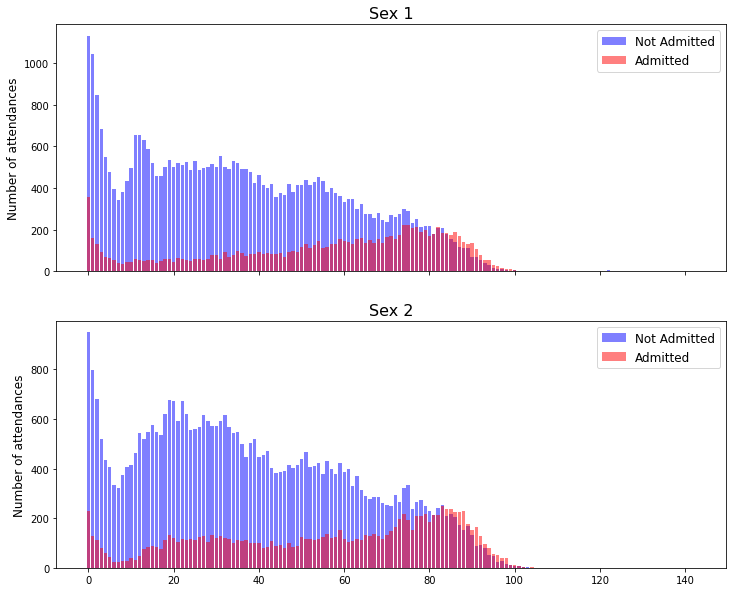

<IPython.core.display.Javascript object>

In [13]:
vis_fig, vis_axs = visualise_data(X, y)

# Model Training

In [14]:
LR = LogisticRegressionWrapper(random_state=RANDOM_STATE)

<IPython.core.display.Javascript object>

In [15]:
LR.model.fit(X_train, y_train.values.ravel())

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['age_at_arrival']),
                                                 ('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['sex'])])),
                ('classifier', LogisticRegression(random_state=42))])

<IPython.core.display.Javascript object>

# Model predictions

In [16]:
y_score = LR.model.decision_function(X_test)
y_pred = LR.model.predict(X_test)

<IPython.core.display.Javascript object>

# Visualise ROC curve

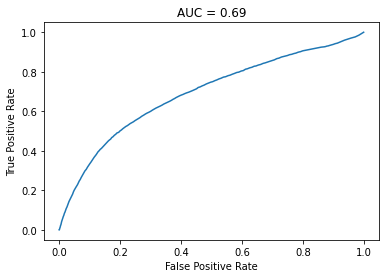

<IPython.core.display.Javascript object>

In [17]:
plot_roc(y_test, y_score)

# Visualise Confusion Matrix

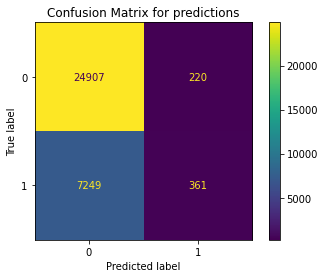

<IPython.core.display.Javascript object>

In [18]:
plot_confusion_matrix(y_test, y_pred, normalize=None)

# Compute performance metrics for default threshold

In [20]:
performance_data = get_performance_metrics(y_test, y_pred)

print_performance_metrics(performance_data)

True class balance:
admitted
0.0         0.767541
1.0         0.232459
dtype: float64

Accuracy score: 0.771848367290833

F1 score: 0.08814552557685265

Precision score: 0.621342512908778

Recall score: 0.047437582128777925


True

<IPython.core.display.Javascript object>

In [22]:
performance_data.true_class_balance

admitted
0.0         0.767541
1.0         0.232459
dtype: float64

<IPython.core.display.Javascript object>